In [2]:
# From here: https://stackoverflow.com/questions/49264194/import-py-file-in-another-directory-in-jupyter-notebook
import sys
import os
from datetime import datetime

module_path = os.path.abspath(os.path.join('../..'))

if module_path not in sys.path:
    sys.path.append(module_path)


In [3]:
import numpy as np
import copy

import src.utils as utils
from src.nqs import RBM, IsingHamiltonian, IsingHamiltonianReduced
from config_parser import get_config_file

import matplotlib.pyplot as plt
%matplotlib notebook


In [4]:
visible_size = 4
hidden_size = 6
seed = 44  # Seed for random number generator
walker_steps = 1000
gradient_steps = 100


In [5]:
np.random.seed(seed)

gamma = utils.random_gamma(visible_size)
ih = IsingHamiltonian(gamma=gamma)
ihr = IsingHamiltonianReduced(gamma=gamma)


In [6]:
eig,_ = np.linalg.eigh(ih)
I_truth = np.min(eig)
print(f"E_truth: {I_truth}")


E_truth: -3.313112070611122


In [7]:
ising_reduced_rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=ihr, walker_steps=walker_steps)
ir_energy_list = [it for it in ising_reduced_rbm.train(iterations=gradient_steps, lr=0.01, print_energy=False)]

func:train args:[(<src.nqs.RBM object at 0x000002844C815C40>,), {'iterations': 100, 'lr': 0.01, 'print_energy': False}] took: 33.84276866912842 sec


In [8]:
ising_rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=ih, walker_steps=walker_steps)
i_energy_list = [it for it in ising_rbm.train(iterations=gradient_steps, lr=0.01,print_energy=False)]

func:train args:[(<src.nqs.RBM object at 0x000002844C815370>,), {'iterations': 100, 'lr': 0.01, 'print_energy': False}] took: 33.32465386390686 sec


<IPython.core.display.Javascript object>


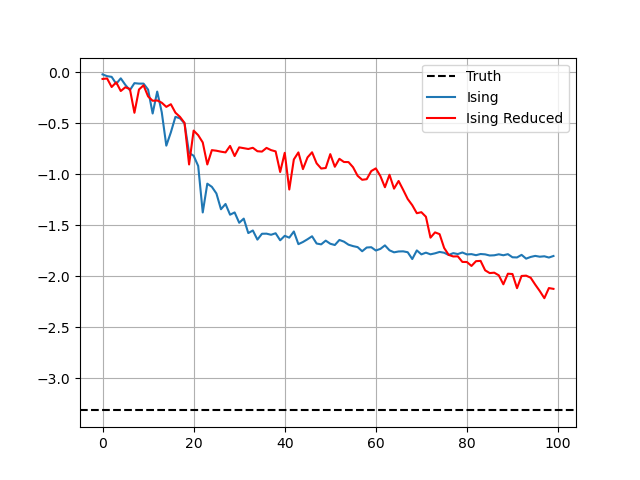

In [9]:
plt.axhline(y=I_truth, color='k', linestyle='--')
plt.plot(i_energy_list)
plt.plot(ir_energy_list, 'r')
plt.grid()

plt.legend(['Truth', 'Ising', 'Ising Reduced'])

plt.show()

In [36]:
time_matrix = []
time_reduced = []
n_list = []


seed = 44  # Seed for random number generator
walker_steps = 100
gradient_steps = 10


hidden_size = 16

for i in range(2, 11):
    
    visible_size = i
    
    n_list.append(visible_size*hidden_size)
    
    gamma = utils.random_gamma(visible_size)
    ih = IsingHamiltonian(gamma=gamma)
    ihr = IsingHamiltonianReduced(gamma=gamma)
    
    ising_rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=ih, walker_steps=0)
    ising_rbm.train(iterations=gradient_steps, lr=0.01,print_energy=False)
    time_matrix.append(ising_rbm.train.run_time)

    ising_reduced_rbm = RBM(visible_size=visible_size, hidden_size=hidden_size, hamiltonian=ihr, walker_steps=walker_steps)
    ising_reduced_rbm.train(iterations=gradient_steps, lr=0.01,print_energy=False)
    time_reduced.append(ising_reduced_rbm.train.run_time)
    

func:train args:[(<src.nqs.RBM object at 0x00000284539BA8B0>,), {'iterations': 10, 'lr': 0.01, 'print_energy': False}] took: 0.007000923156738281 sec
func:train args:[(<src.nqs.RBM object at 0x0000028451FA6310>,), {'iterations': 10, 'lr': 0.01, 'print_energy': False}] took: 0.32849788665771484 sec
func:train args:[(<src.nqs.RBM object at 0x00000284523E51F0>,), {'iterations': 10, 'lr': 0.01, 'print_energy': False}] took: 0.006993770599365234 sec
func:train args:[(<src.nqs.RBM object at 0x00000284523E5BB0>,), {'iterations': 10, 'lr': 0.01, 'print_energy': False}] took: 0.3287467956542969 sec
func:train args:[(<src.nqs.RBM object at 0x00000284539BAC10>,), {'iterations': 10, 'lr': 0.01, 'print_energy': False}] took: 0.009997844696044922 sec
func:train args:[(<src.nqs.RBM object at 0x00000284523E51F0>,), {'iterations': 10, 'lr': 0.01, 'print_energy': False}] took: 0.35713648796081543 sec
func:train args:[(<src.nqs.RBM object at 0x0000028451985190>,), {'iterations': 10, 'lr': 0.01, 'print_en

<IPython.core.display.Javascript object>


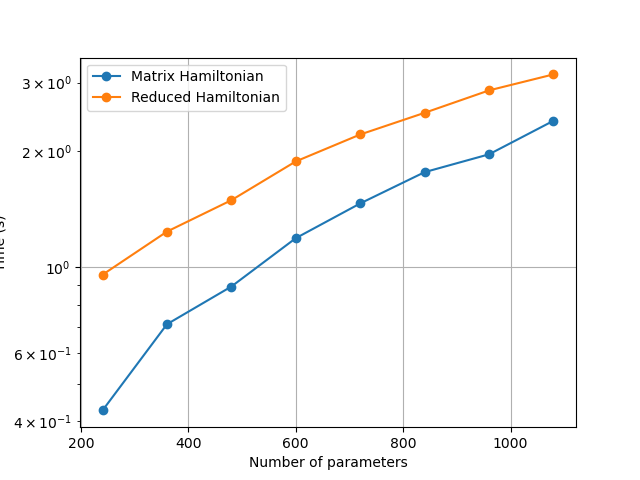

Text(0, 0.5, 'Time (s)')

In [33]:
plt.figure(2)

plt.semilogy(n_list[:10], time_matrix, marker = 'o')
plt.semilogy(n_list[:10], time_reduced, marker = 'o')
plt.grid()

#plt.title("Training time using matrix and reduced Hamiltonian representations")
plt.legend(['Matrix Hamiltonian', 'Reduced Hamiltonian'])
plt.xlabel('Number of parameters')
plt.ylabel('Time (s)')

In [31]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/TimingHidden2-10V.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")

<IPython.core.display.Javascript object>


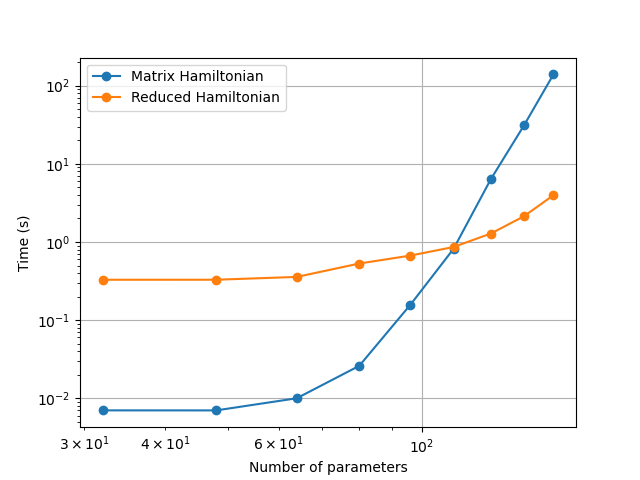

Text(0, 0.5, 'Time (s)')

In [37]:
plt.figure(3)

plt.loglog(n_list[:10], time_matrix, marker = 'o')
plt.loglog(n_list[:10], time_reduced, marker = 'o')
plt.grid()

#plt.title("Training time using matrix and reduced Hamiltonian representations")
plt.legend(['Matrix Hamiltonian', 'Reduced Hamiltonian'])
plt.xlabel('Number of parameters')
plt.ylabel('Time (s)')

In [39]:
# Save figure as pdf
username = os.getlogin()
desktop_path = f"{os.path.expanduser(os.getenv('USERPROFILE'))}\\Desktop"

date_format = '%Y.%m.%d:%H%M'

path = f"{desktop_path}/TimingVisible2-10loglog.pdf"

plt.savefig(f"{path}",bbox_inches = "tight")